In [3]:
! git clone https://www.github.com/DS3001/assignment2

fatal: destination path 'assignment2' already exists and is not an empty directory.


In [51]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('assignment2/data/airbnb_hw.csv') #Read in data for question 2 part 1 

In [6]:
df.head() #I did this to get an overall idea of the data

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [7]:
df.info() #There is orginally 30478 entries 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(3), object

In [8]:
df["Price"].unique() #This revealed what those values looked like specfically, through this process I noticed that after 999 commons were used 

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [9]:
df['Price'] = df['Price'].str.replace(',', '', regex=True) #This replaced the commas  


In [21]:
df["Price"].unique() #This checked to see if the commas were replaced 

array([  145.,    37.,    28.,   199.,   549.,   149.,   250.,    90.,
         270.,   290.,   170.,    59.,    49.,    68.,   285.,    75.,
         100.,   150.,   700.,   125.,   175.,    40.,    89.,    95.,
          99.,   499.,   120.,    79.,   110.,   180.,   143.,   230.,
         350.,   135.,    85.,    60.,    70.,    55.,    44.,   200.,
         165.,   115.,    74.,    84.,   129.,    50.,   185.,    80.,
         190.,   140.,    45.,    65.,   225.,   600.,   109.,  1990.,
          73.,   240.,    72.,   105.,   155.,   160.,    42.,   132.,
         117.,   295.,   280.,   159.,   107.,    69.,   239.,   220.,
         399.,   130.,   375.,   585.,   275.,   139.,   260.,    35.,
         133.,   300.,   289.,   179.,    98.,   195.,    29.,    27.,
          39.,   249.,   192.,   142.,   169.,  1000.,   131.,   138.,
         113.,   122.,   329.,   101.,   475.,   238.,   272.,   308.,
         126.,   235.,   315.,   248.,   128.,    56.,   207.,   450.,
      

In [24]:
price_data_type = df['Price'].dtype
print(price_data_type) #Because the column values represent price I wanted to make sure they were floats 


float64


In [19]:
df.dropna(subset=['Price'], inplace=True) #This droped any missing values 

In [25]:
df.info() #This checked if I had any missing values which I did not


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  float64
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(5), int64(3), object

In [49]:
df.to_csv('assignment2/data/cleanairbnb_hw') #saved cleaned data


In [39]:
tf = pd.read_csv('assignment2/data/sharks.csv') #Read in data for question 2 part 2

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<AxesSubplot:>

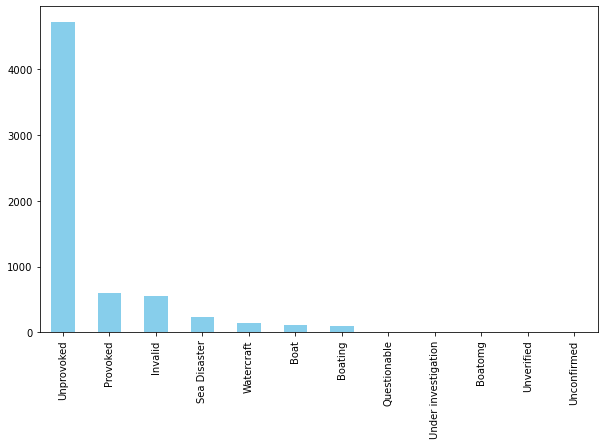

In [40]:
type_counts = tf['Type'].value_counts().sort_values(ascending=False)
type_counts.plot(kind='bar', color='skyblue', figsize=(10, 6)) #I did this to get a better understanding of the data and distrubtion of the values 

In [33]:
tf["Type"].unique() #I did this so I could see the actual values in type 

array(['Unprovoked', 'Provoked', 'Questionable', 'Watercraft',
       'Unconfirmed', 'Unverified', 'Invalid', 'Under investigation',
       'Boating', 'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [34]:
tf['Type'] = tf['Type'].replace(['Boating', 'Boat', 'Boatomg'], 'Watercraft')
tf['Type'] = tf['Type'].replace(['Questionable', 'Unverified'], 'Unconfirmed')
tf['Type'].fillna('Invalid', inplace=True) #I thought that all these values "Boating, Boat, Boatomg" were just ways to desribed watercraft so I categorized, these values "Questionable, Unverified" seemed like ways to describe unconfirmed so I categorized them togeather, "na" sounded like the same as Invvalid so I catorized them togeather. 


In [35]:
tf["Type"].unique() #This comfirmed that the change in categorization worked 

array(['Unprovoked', 'Provoked', 'Unconfirmed', 'Watercraft', 'Invalid',
       'Under investigation', 'Sea Disaster'], dtype=object)

<AxesSubplot:>

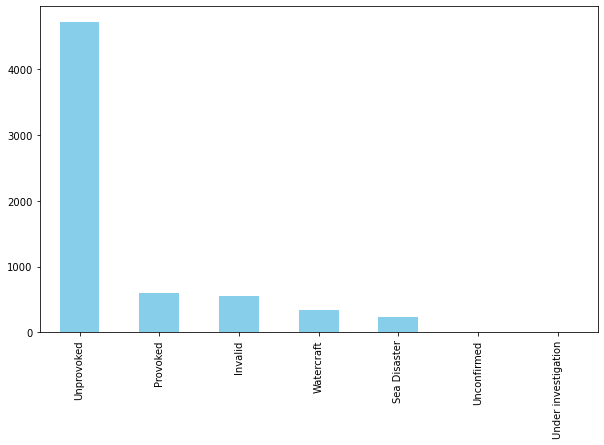

In [37]:
type_counts = tf['Type'].value_counts().sort_values(ascending=False)
type_counts.plot(kind='bar', color='skyblue', figsize=(10, 6)) #I did this to confirm that the new categorization made data easier to visualize/understand


In [50]:
df.to_csv('assignment2/data/cleansharks')#saved cleaned data

In [41]:
cf = pd.read_csv('visualization/data/pretrial_data.csv')  #Read in data for question 2 part 3

In [42]:
cf.head() 

,Unnamed: 0,case_type,age,sex,race,is_poor,bond,bond_type,prior_F,prior_M,gini,released,sentence_type,sentence,bond_NA,held_wo_bail,sentence_NA
0,0,F,31.0,M,W,NaN,NaN,7,0.0,0.0,0.44,NaN,NaN,NaN,True,False,True
1,1,F,60.0,M,B,NaN,NaN,7,13.0,21.0,0.44,0.0,0.0,60.000000,True,False,False
2,2,M,27.0,M,W,NaN,NaN,7,0.0,0.0,0.44,0.0,1.0,12.000000,True,False,False
3,3,M,27.0,M,B,0.0,NaN,7,0.0,9.0,0.44,0.0,1.0,0.985626,True,False,False
4,4,F,28.0,F,W,0.0,NaN,7,0.0,0.0,0.44,1.0,4.0,0.000000,True,False,True


In [43]:
cf = cf.rename(columns={
    'sentence':'ImposedSentenceAllChargeInContactEvent',
    'sentence_type':'SentenceTypeAllChargesAtConvictionInContactEvent',
    'released': 'WhetherDefendantWasReleasedPretrial'
}) #I changed the names to make it easier understand 

In [44]:
cf["WhetherDefendantWasReleasedPretrial"].unique() #I did this so I could see the actual values 

array([nan,  0.,  1.])

In [45]:
cf['WhetherDefendantWasReleasedPretrial'] = cf['WhetherDefendantWasReleasedPretrial'].replace("", np.nan)
cf['WhetherDefendantWasReleasedPretrial'] = cf['WhetherDefendantWasReleasedPretrial'].replace("9", np.nan) #This replaced this missing values with np.nan

In [48]:
cf["WhetherDefendantWasReleasedPretrial"].unique()  #This comfirmed that the replacing this missing values with np.nan worked

array([nan,  0.,  1.])

In [52]:
cf["ImposedSentenceAllChargeInContactEvent"].unique() #I did this so I could see the actual values 

array([           nan, 6.00000000e+01, 1.20000000e+01, 9.85626283e-01,
       0.00000000e+00, 3.60000000e+01, 6.00000000e+00, 2.40000000e+01,
       5.91375770e+00, 1.20000000e+02, 7.20000000e+01, 1.19917864e+01,
       2.95687885e+00, 8.40000000e+01, 1.08000000e+02, 3.00000000e+02,
       2.40000000e+02, 1.80000000e+02, 4.00000000e+00, 9.60000000e+01,
       2.00000000e+00, 5.40000000e+01, 3.28542094e-01, 4.40000000e+01,
       5.00000000e+00, 1.15000000e+02, 1.32000000e+02, 4.80000000e+01,
       2.58000000e+02, 3.40000000e+01, 7.60000000e+01, 1.64271047e-01,
       1.31416838e-01, 1.11000000e+02, 9.00000000e+00, 3.00000000e+00,
       1.97125257e+00, 3.69856263e+01, 6.57084189e-02, 3.54928131e+01,
       1.06492813e+02, 8.00000000e+00, 3.50000000e+01, 1.83141684e+01,
       4.80000000e+02, 3.20000000e+01, 9.30000000e+01, 2.34000000e+02,
       7.32000000e+02, 1.16427105e+00, 4.65708419e+00, 2.10000000e+01,
       7.00000000e+00, 4.49281314e+00, 1.80000000e+01, 6.00000000e+02,
      

In [53]:
cf["SentenceTypeAllChargesAtConvictionInContactEvent"].unique() #I did this so I could see the actual values 

array([nan,  0.,  1.,  4.,  2.])

In [62]:
cf.loc[(cf['SentenceTypeAllChargesAtConvictionInContactEvent'] == 9), 'ImposedSentenceAllChargeInContactEvent'] = np.nan
cf.loc[cf['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4, 'ImposedSentenceAllChargeInContactEvent'] = np.nan
cf.loc[cf['SentenceTypeAllChargesAtConvictionInContactEvent'] == 0, 'ImposedSentenceAllChargeInContactEvent'] = 0
#By looking at the codebook I determined that if SentenceTypeAllChargesAtConvictionInContactEvent was 0 then that ment that there was a charge of "Probation/no incarceration" therefore if ImposedSentenceAllChargeInContactEvent was missing it should be 0
#While if SentenceTypeAllChargesAtConvictionInContactEvent was 4 (aka "Other, all charges in cohort contact resulted in pending, dismissed, deferred, etc.") or 9 (aka "Not applicable (e.g., disposition record not found, or unknown)") then the correspondingImposedSentenceAllChargeInContactEvent should be np.nan



In [63]:
cf["ImposedSentenceAllChargeInContactEvent"].unique() #Checked to see if the code to fill in the missing values for ImposedSentenceAllChargeInContactEvent worked

array([nan, 0, 12.0, 0.9856262833675559, 36.0, 24.0, 120.0, 60.0, 72.0,
       11.9917864476386, 84.0, 180.0, 4.0, 96.0, 2.0, 44.0, 5.0, 115.0,
       132.0, 0.328542094455852, 48.0, 258.0, 34.0, 76.0,
       0.131416837782341, 111.0, 9.0, 3.0, 6.0, 1.97125256673511,
       36.9856262833676, 0.0657084188911704, 35.4928131416838,
       106.492813141684, 8.0, 54.0, 18.3141683778234, 480.0, 32.0, 93.0,
       234.0, 732.0, 1.16427104722793, 240.0, 4.6570841889117, 21.0, 7.0,
       4.49281314168378, 18.0, 600.0, 43.1642710472279, 179.0, 300.0,
       52.0, 20.0, 192.0, 702.0, 14.0, 55.0, 5.91375770020534, 30.0,
       108.0, 68.0, 0.657084188911704, 46.62422997946611, 65.0, 200.0,
       2.95687885010267, 24.3285420944559, 12.1642710472279, 117.0,
       81.4928131416838, 22.492813141683804, 1980.0, 3.6570841889117003,
       56.0, 10.0, 2.7926078028747403, 1.0, 47.0, 22.0, 102.0, 1500.0,
       40.0, 284.0, 11.0, 42.0, 162.0, 156.0, 47.2956878850103, 105.0,
       51.0, 246.0, 75.0, 324

In [59]:
df.to_csv('visualization/data/cleanpretrial_data')#saved cleaned data

In [21]:
kf = pd.read_csv("visualization/data/pretrial_data.csv") #Question 3 part 1

In [17]:
#Question 3 part 2
print(kf.shape, '\n') # The dimensions of df: (3798, 63) The number of observation:3798
print(kf.dtypes, '\n') # The types of the variable 
kf.head()

(3798, 63) 

index                int64
unitid               int64
chronname           object
city                object
state               object
                    ...   
state_sector_ct      int64
carnegie_ct          int64
counted_pct         object
nicknames           object
cohort_size        float64
Length: 63, dtype: object 



,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [18]:
#Question 3 part 3
pd.crosstab( kf['control'], kf['level'] ) #Cross tabulate
#Observations: Public institutions have a higher number of both 2-year and 4-year institutions compared to private institutions, Private not-for-profit institutions have the highest number of 4-year institutions among all categories, Private for-profit institutions have a significant number of 4-year institutions, but they also have a notable presence of 2-year institutions.

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


<AxesSubplot:xlabel='grad_100_value', ylabel='Count'>

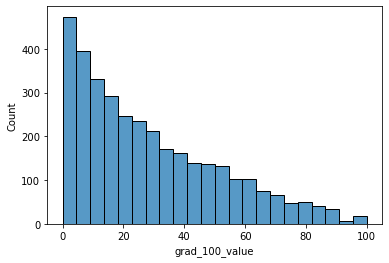

In [19]:
#Question 3 part 4
var= 'grad_100_value'
sns.histplot(kf[var]) #histplot



<AxesSubplot:xlabel='grad_100_value', ylabel='Density'>

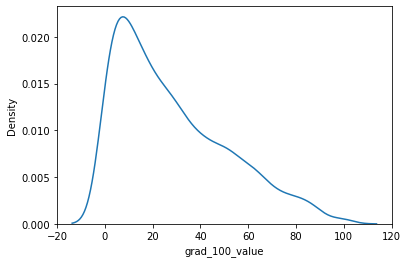

In [20]:
#Question 3 part 4
sns.kdeplot(kf[var]) # A kernel density plot

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grad_100_value'>

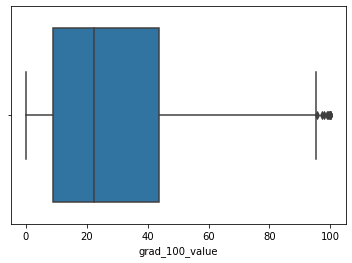

In [22]:
#Question 3 part 4
sns.boxplot(kf[var]) # A kernel density plot

In [23]:
#Question 3 part 4
kf[var].describe()# Statistical description

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

<AxesSubplot:xlabel='grad_100_value', ylabel='Density'>

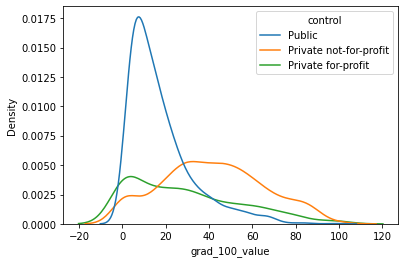

In [24]:
#Question 3 part 5:  A grouped kernel density plot by control
sns.kdeplot(data=kf, x=var, hue='control')

In [ ]:
#Describe what you see: Private not-for-profit instutions have the highest gradation rates, private for-profit have the secound highest graduation rates and public institutions have the lowest graduation rates

<AxesSubplot:xlabel='grad_100_value', ylabel='Density'>

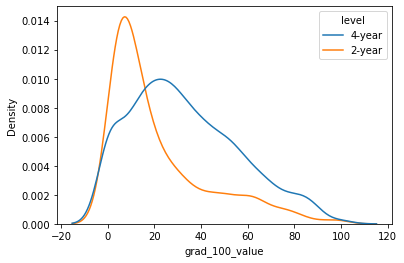

In [25]:
#Question 3 part 5:  A grouped kernel density plot by level
sns.kdeplot(data=kf, x=var, hue='level')

In [ ]:
#Describe what you see: Four year instutions have higher gradation rates compared to two year institutions

In [26]:
#Question 3 part 5:Grouped calculations of statistical descriptions
kf.groupby('control')[var].describe() 
kf.groupby('level')[var].describe()



,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1455.0,21.636151,21.645747,0.0,6.0,13.0,30.600,100.0
4-year,2012.0,33.230119,23.270160,0.0,15.2,29.7,49.225,100.0


In [27]:
#Which institutions appear to have the best graduation rates?: Based on the means 4-year institutions have higher graduation rates compared to 2-year institutions but there is a lot of variability in graduation rates for 4-year institutions indicated by the high standard deviation.

In [28]:
##Question 3 part 6: Create a new variable
kf['levelXcontrol'] = kf['level'] + ', ' + kf['control'] 

<AxesSubplot:xlabel='grad_100_value', ylabel='Density'>

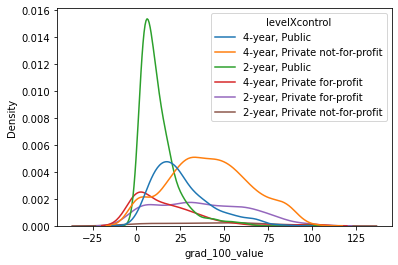

In [29]:
#Question 3 part 6:Grouped kernel density plot
sns.kdeplot(data=kf, x=var, hue='levelXcontrol')

In [30]:
#Which institutions appear to have the best graduation rates?:Based on peaks demostrated by the kernel density plot 4-year private not-for-profit has the best graduation rate shifts

<AxesSubplot:xlabel='aid_value', ylabel='Density'>

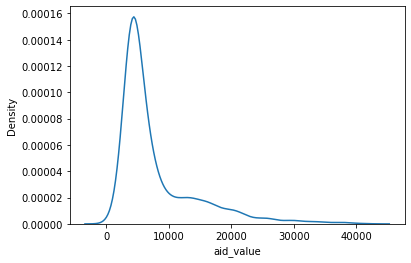

In [31]:
#Question 3 part 7: Kernel density plot of aid_valu
sns.kdeplot(data=kf, x='aid_value')

<AxesSubplot:xlabel='aid_value', ylabel='Density'>

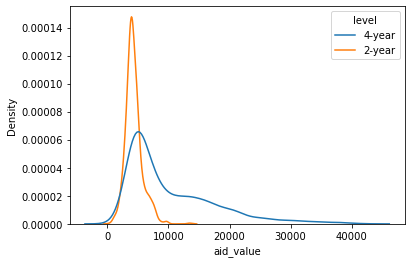

In [32]:
#Question 3 part 7: Kernel density plot of aid_valu groupby level 
sns.kdeplot(data=kf, x='aid_value', hue= 'level')

<AxesSubplot:xlabel='aid_value', ylabel='Density'>

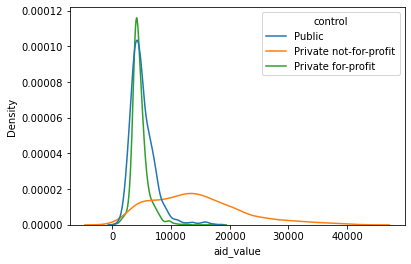

In [33]:
#Question 3 part 7: Kernel density plot of aid_valu groupby control
sns.kdeplot(data=kf, x='aid_value', hue= 'control')

In [34]:
#What explains the bi-modal nature of the graph?: The bi-modal of the graph could be explain by the fact that there are two peaks of instutions with different aid values, this makes sense as there are public and private (not-for-profit and for-profit) institutions which give out differing amounts of aid.

In [35]:
#Question 3 part 7: Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control
kf.groupby(['level', 'control'])['aid_value'].describe()


count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

<AxesSubplot:xlabel='aid_value', ylabel='grad_100_value'>

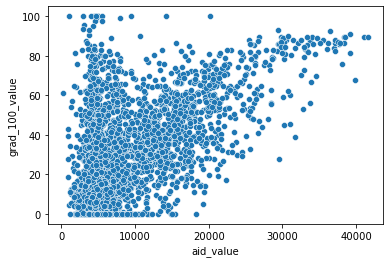

In [36]:
#Question 3 part 8: Scatterplot of grad_100_value by aid_value
sns.scatterplot(data=kf, x='aid_value', y='grad_100_value')

In [37]:
#Describe what you see: As aid increases graduation rates increase 

<AxesSubplot:xlabel='aid_value', ylabel='grad_100_value'>

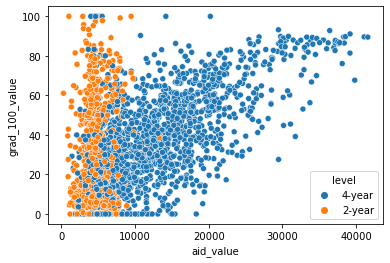

In [38]:
#Question 3 part 8: Scatterplot of grad_100_value by aid_value grouping by level
sns.scatterplot(data=kf, x='aid_value', y='grad_100_value', hue='level')

<AxesSubplot:xlabel='aid_value', ylabel='grad_100_value'>

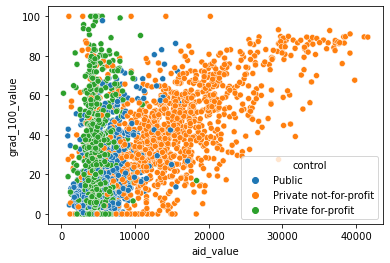

In [39]:
##Question 3 part 8: Scatterplot of grad_100_value by aid_value grouping by control
sns.scatterplot(data=kf, x='aid_value', y='grad_100_value', hue='control')

In [40]:
#Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?:
#4 year instutions and private not-for-profit institutions are the insutions where aid seems to increase graduation rates.